In [ ]:
from pytubefix import YouTube
def trans(url):
  yt = YouTube(url)
  for caption in yt.captions:
      print(caption)

  caption = yt.captions.get_by_language_code('en')
  if caption is None:
      caption = yt.captions.get_by_language_code('a.en')
  if caption:
      srt_captions = caption.generate_srt_captions()

      # Save to file
      with open("transcript.srt", "w", encoding='utf-8') as f:
          f.write(srt_captions)
      print("Transcript saved to transcript.srt")
  else:
      print("English or auto-generated English captions not found.")

In [ ]:
def clean_srt_file(input_path, output_path):
    with open(input_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    clean_lines = []
    for line in lines:
        line = line.strip()
        if line.isdigit():
            continue
        if '-->' in line:
            continue
        if line == '':
            continue
        clean_lines.append(line)

    with open(output_path, 'w', encoding='utf-8') as file:
        for line in clean_lines:
            file.write(line + '\n')


In [ ]:
def clean2():
  with open("clean_transcript.txt", "r", encoding="utf-8") as file:
      content = file.read()

  # Replace newlines with spaces
  clean_text = content.replace('\n', ' ')

  # Split the text by full stops
  sentences = clean_text.split('.')

  # Open the output file in append mode
  with open("hello.txt", "a", encoding="utf-8") as outfile:
      for sentence in sentences:
          sentence = sentence.strip()
          if sentence:  # skip empty sentences
              outfile.write(sentence + ".\n")

In [ ]:
def pred():
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import train_test_split
  ndf = pd.read_csv("clean_ds.csv",encoding='ISO-8859-1')
  ndf['text'] = ndf['text'].fillna('')
  X = ndf['text']
  y = ndf['sentiment']
  with open('hello.txt', 'r', encoding='utf-8') as file:
      lines = file.readlines()
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  import pandas as pd

  ndf = pd.read_csv("/content/clean_ds.csv",encoding='ISO-8859-1')
  ndf['text'] = ndf['text'].fillna('')
  X = ndf['text']
  y = ndf['sentiment']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  vectorizer = TfidfVectorizer()
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)

  model = LogisticRegression()
  model.fit(X_train_vec, y_train)
  X2 = ndf['text']
  y2 = ndf['sentiment']
  vectorizer = TfidfVectorizer()

  global pos
  pos = 0
  global neg
  neg = 0
  global neu
  neu = 0
  for line in lines:
      X_test = [line.strip()]
      X_test_vec = vectorizer.transform(X_test)
      y_pred = model.predict(X_test_vec)
      if y_pred == 'positive':
        pos = pos + 1
      elif y_pred == 'negative':
        neg = neg + 1
      else:
        neu = neu + 1
      print(X_test,y_pred)


In [ ]:
# Visualization
def plot():
  print(pos,neg,neu)
  import matplotlib.pyplot as plt
  sentiment_counts = [pos, neg, neu]
  sentiment_labels = ['Positive', 'Negative', 'Neutral']

  # Create the bar chart
  plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red', 'gray'])

  plt.title('Sentiment Distribution in Transcript')
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.show()

Enter the YouTube URL: https://www.youtube.com/watch?v=38GNKtclDdE
<Caption lang="English (auto-generated)" code="a.en">


<ipython-input-48-3381debb885f>:7: DeprecationWarning: Call to deprecated function get_by_language_code (This object can be treated as a dictionary, i.e. captions['en']).
  caption = yt.captions.get_by_language_code('en')
<ipython-input-48-3381debb885f>:9: DeprecationWarning: Call to deprecated function get_by_language_code (This object can be treated as a dictionary, i.e. captions['en']).
  caption = yt.captions.get_by_language_code('a.en')


Transcript saved to transcript.srt
['Learn how to code rest APIs int 9 as an absolute beginner.'] ['neutral']
['This step-by-step guide from Alan Omary is for those new to ASP.'] ['neutral']
['NET Core.'] ['neutral']
['It covers everything from what REST APIs are to handling CRUD operations and connecting to a SQL server database.'] ['neutral']
['If you want to learn a REST APIs in ASP.'] ['neutral']
["NET Core, where do you even start? It's hard to get started without facing information overload."] ['negative']
["That's exactly why I created this beginnerfriendly course."] ['neutral']
['Starting with what the rest APIs even are and why we use them.'] ['neutral']
['Then moving into.'] ['neutral']
['NET 9 to show you how to create APIs, handle all the main HTTP requests, connect your APIs to a SQL server database so your data persists and perform all the crowd operations.'] ['neutral']
['Well, welcome to code the future here.'] ['positive']
['My goal is to help you learn C# and net on y

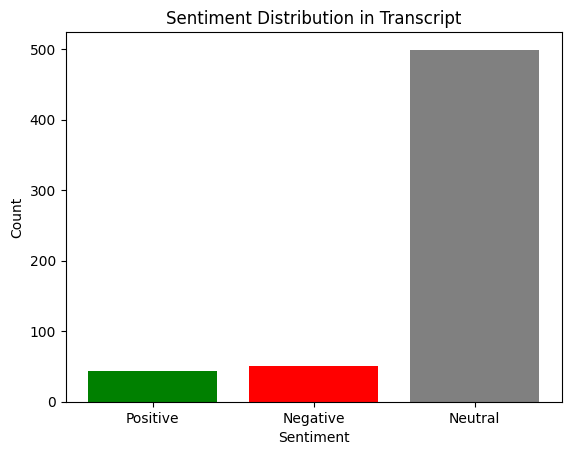

In [ ]:
url = input("Enter the YouTube URL: ")

trans(url)
clean_srt_file('transcript.srt', 'clean_transcript.txt')
clean2()
pred()
plot()